In [1]:
%pylab inline
import mpld3
mpld3.enable_notebook() # Allows you to zoom in on plots

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division
import math
normrnd = random.normal # (mu, std)

In [3]:
fact = math.factorial

def nCr(n, k):
    return fact(n)/fact(k)/fact(n-k)

def pmf(n, p):
    return [nCr(n, k)*(p**k)*((1-p)**(n-k)) for k in range(n+1)]

def ccdf(codelength, success_pr):
    pm = pmf(codelength, success_pr)
    # print('pmf', pm)
    lst = [1]
    for val in pm:
        lst.append(lst[-1]-val)
    return lst[1:len(lst)-1] # 0th pos = probability 1 bit success, minimum sending 1 bit across the channel

In [46]:
# Sandbox so I can understand what's going on with the Binomial ccdf
test = ccdf(4, 0.1)
print(test)
print(1-asarray(test))

[1, 0.3439, 0.05229999999999996, 0.0036999999999999464, 9.999999999994562e-05]
[ 0.      0.6561  0.9477  0.9963  0.9999]


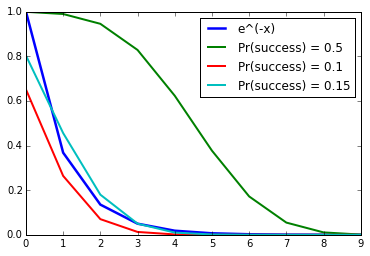

In [22]:
# Comparing the Binomial CDF with exponential decay

plot([math.exp(-x) for x in range(10)], lw=2.5, label="e^(-x)")
plot(ccdf(10, 0.5), lw=2.0, label="Pr(success) = 0.5")
plot(ccdf(10, 0.1), lw=2.0, label="Pr(success) = 0.1")
plot(ccdf(10, 0.15), lw=2.0, label="Pr(success) = 0.15")

legend()

(1.1639286335325563, (array([1]),))


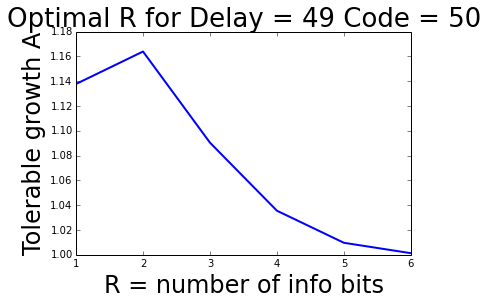

In [90]:
# Set Delay: Theoretical curve of R vs A

D = 5
b = 1 # bits per unit time across channel
code = (D+1)*b # number of bits in code
#alph = linspace(0,1,101)
# alph = 0.01:0.01:1 # rate n/(n+k)
#R = alph*(D+1)*b # number of bits of information
R = linspace(1, code, code) # type: ndarray

#print(R)

mu_c = 1
varc = 2**(-2*R)

#dropp = asarray([fact(code)/fact(k)/fact(code-k)*2**(-(code-k+1)) for k in R]) #convert back to array
drop_pr = 1-asarray(ccdf(code, 0.5))

#dropp = choose*2**(-(code - R +1))
# success = 1 - 2**(-(code - R +1))

z = (mu_c**2+varc)/(drop_pr*mu_c**2+varc)
a = z**(1/(2*(D+1)))
# k = log(z)./(2*log(a))

#print('a', a)
print(max(a), numpy.where(a==max(a)))

figure()
# plot(alph,a,'LineWidth',2)
plot(R,a,linewidth=2.0)
xlabel('R = number of info bits',fontsize=24), ylabel('Tolerable growth A',fontsize=24)
# title('Theoretical Effect of Alpha on A, Various Delays', fontsize=26)
title('Optimal R for Delay = 49 Code = 50', fontsize=26)
#savefig('../151124/binomial_delay49.pdf')

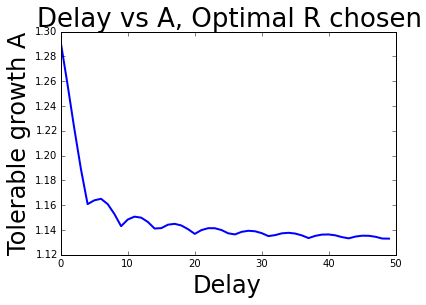

In [19]:
# Theoretical curve of Delay vs A

lst = []
totaldelay = 50
for D in range(totaldelay):
    b = 1 # bits per unit time across channel
    code = (D+1)*b # number of bits in code
    R = linspace(1, code, code) # type: ndarray

    mu_c = 1
    varc = 2**(-2*R)

    drop_pr = 1-asarray(ccdf(code, 0.5))

    z = (mu_c**2+varc)/(drop_pr*mu_c**2+varc)
    a = z**(1/(2*(D+1)))
    lst.append(max(a)) 
# k = log(z)/(2*log(a))

figure()
plot(range(totaldelay),lst,linewidth=2.0)
xlabel('Delay',fontsize=24), ylabel('Tolerable growth A',fontsize=24)

title('Delay vs A, Optimal R chosen', fontsize=26)
# savefig('../151124/binomial_delayvsa.pdf')

In [76]:
# Sandbox where I can see exactly what's going on for a given delay value

lst = []
D = 1
b = 1 # bits per unit time across channel
code = (D+1)*b # number of bits in code
print('code', code)
R = linspace(1, code, code) # type: ndarray
print('R', R)

mu_c = 1
varc = 2**(-2*R)
print('varc', varc)

drop_pr = 1-asarray(ccdf(code, 0.5))
print('drop_pr', drop_pr)

z = (mu_c**2+varc)/(drop_pr*mu_c**2+varc)
a = z**(1/(2*(D+1)))
print('a', a)
lst.append(max(a))
print('lst', lst)
# k = log(z)./(2*log(a))

('code', 2)
('R', array([ 1.,  2.]))
('varc', array([ 0.25  ,  0.0625]))
('pmf', [0.25, 0.5, 0.25])
('prob', array([ 0.25,  0.75]))
('a', array([ 1.25743343,  1.06936605]))
('lst', [1.2574334296829355])


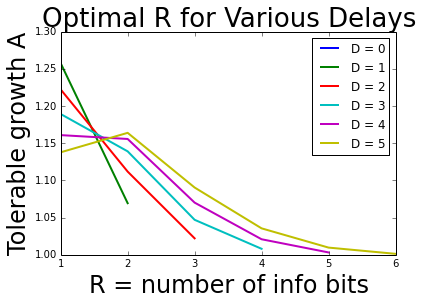

In [112]:
# Optimal R, Various Delays

delays = [0, 1, 2, 3, 4, 5]

for D in delays:
    b = 1 # bits per unit time across channel
    code = (D+1)*b # number of bits in code
    R = linspace(1, code, code) # type: ndarray


    mu_c = 1
    varc = 2**(-2*R)

    drop_pr = 1-asarray(ccdf(code, 0.5))

    z = (mu_c**2+varc)/(drop_pr*mu_c**2+varc)
    a = z**(1/(2*(D+1)))
    line, = plot(R,a,linewidth=2.0)
    line.set_label('D = ' + str(D))
# k = log(z)./(2*log(a))

#print('a', a)
# print(max(a), numpy.where(a==max(a)))

xlabel('R = number of info bits',fontsize=24), ylabel('Tolerable growth A',fontsize=24)
title('Optimal R for Various Delays', fontsize=26)
legend()
# savefig('../151124/binomial_optimalr_d0-5.pdf')

0.183668657258


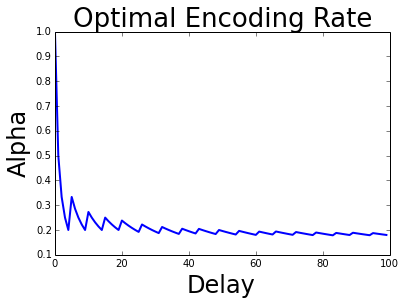

In [124]:
# Optimal alphas

lst = []
alphas = []
for D in range(100):
    b = 1 # bits per unit time across channel
    code = (D+1)*b # number of bits in code
    R = linspace(1, code, code) # type: ndarray

    mu_c = 1
    varc = 2**(-2*R)

    drop_pr = 1-asarray(ccdf(code, 0.5))

    z = (mu_c**2+varc)/(drop_pr*mu_c**2+varc)
    a = z**(1/(2*(D+1)))
    #print('D = ', D)
    #print(a)
    optimal_r = numpy.where(a==max(a))
    #print(optimal_r[0][0])
    #print(optimal_r[0][0]/code)
    #print("===========")
    #print(type(optimal_r[0][0]))
    alphas.append((optimal_r[0][0]+1)/code)
    lst.append(max(a)) 
# k = log(z)./(2*log(a))

# print(alphas)
print(mean(alphas[75:100]))
figure()
plot(range(100),alphas,linewidth=2.0)
xlabel('Delay',fontsize=24), ylabel('Alpha',fontsize=24)

title('Optimal Encoding Rate', fontsize=26)
#savefig('../151124/binomial_optimalr.pdf')

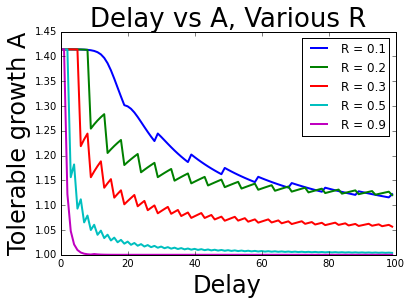

In [18]:
# Theoretical curve of Delay vs A, fixed R (encoding rate)

for alpha in [0.1, 0.2, 0.3, 0.5, 0.9]:
    lst = []
    for D in range(100):
        b = 1 # bits per unit time across channel
        code = (D+1)*b # number of bits in code
        R = linspace(1, code, code) # type: ndarray

        mu_c = 1
        varc = 2**(-2*R)

        drop_pr = 1-asarray(ccdf(code, 0.5))

        z = (mu_c**2+varc)/(drop_pr*mu_c**2+varc)
        a = z**(1/(2*(D+1)))
        #print('R', R)
        #print('A', a)
        actual_r = max(int(alpha*code) - 1, 0)
        lst.append(a[actual_r])
    line, = plot(range(100),lst,linewidth=2.0)
    line.set_label('R = ' + str(alpha))
# k = log(z)/(2*log(a))


xlabel('Delay',fontsize=24), ylabel('Tolerable growth A',fontsize=24)
legend()
title('Delay vs A, Various R', fontsize=26)
savefig('../151125/binomial_delayvsa_fixedalpha.pdf', bbox_inches='tight')

# Explore range 0.1~0.3 with finer resolution
# Understand why R = 0.2 ???

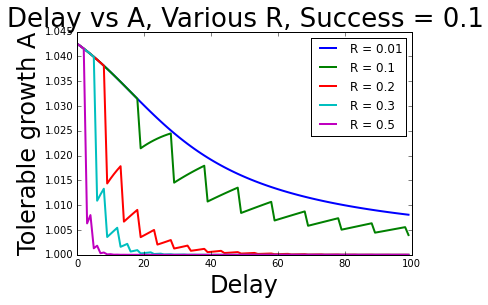

In [10]:
# Theoretical curve of Delay vs A, fixed R (encoding rate)

for alpha in [0.01, 0.1, 0.2, 0.3, 0.5]:
    lst = []
    for D in range(100):
        b = 1 # bits per unit time across channel
        code = (D+1)*b # number of bits in code
        R = linspace(1, code, code) # type: ndarray

        mu_c = 1
        varc = 2**(-2*R)

        drop_pr = 1-asarray(ccdf(code, 0.1))

        z = (mu_c**2+varc)/(drop_pr*mu_c**2+varc)
        a = z**(1/(2*(D+1)))
        #print('R', R)
        #print('A', a)
        actual_r = max(int(alpha*code) - 1, 0)
        lst.append(a[actual_r])
    line, = plot(range(100),lst,linewidth=2.0)
    line.set_label('R = ' + str(alpha))
# k = log(z)/(2*log(a))


xlabel('Delay',fontsize=24), ylabel('Tolerable growth A',fontsize=24)
legend()
title('Delay vs A, Various R, Success = 0.1', fontsize=26)
# savefig('../151125/binomial_delayvsa_fixedalpha.pdf', bbox_inches='tight')

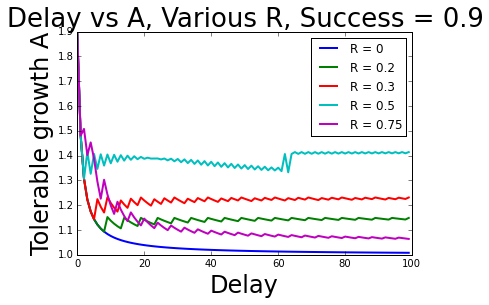

In [12]:
for alpha in [0, 0.2, 0.3, 0.5, 0.75]:
    lst = []
    for D in range(100):
        b = 1 # bits per unit time across channel
        code = (D+1)*b # number of bits in code
        R = linspace(1, code, code) # type: ndarray

        mu_c = 1
        varc = 2**(-2*R)

        drop_pr = 1-asarray(ccdf(code, 0.9))

        z = (mu_c**2+varc)/(drop_pr*mu_c**2+varc)
        a = z**(1/(2*(D+1)))
        #print('R', R)
        #print('A', a)
        actual_r = max(int(alpha*code) - 1, 0)
        lst.append(a[actual_r])
    line, = plot(range(100),lst,linewidth=2.0)
    line.set_label('R = ' + str(alpha))
# k = log(z)/(2*log(a))


xlabel('Delay',fontsize=24), ylabel('Tolerable growth A',fontsize=24)
legend()
title('Delay vs A, Various R, Success = 0.9', fontsize=26)
# savefig('../151125/binomial_delayvsa_fixedalpha.pdf', bbox_inches='tight')

#Make R a function of success probability / drop probability
# For a 1-step increase in delay, how does X(n+1)/X(n) change
#  *  How much "help" is a 1-step increase in delay
# If you give me R bits, how much can I decrease the magnitude of X by?
# Understanding R = 0 bug (result of min 1 bit across channel??)